In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
import os

In [2]:
unharmonized_df=pd.read_csv("adni_ukb_stacked_april19.csv")

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
unharmonized_df.head(5)

,Subject_ID,Group,Sex,Age,Date_of_Brain_Scan,Scanner_Proxy,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,...,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,MaskVol,BrainSegVol_to_eTIV,MaskVol_to_eTIV,EstimatedTotalIntraCranialVol,Dataset
0,1000295,CN,M,59,2017-10-27,Newcastle,2.362,1.277,2.511,2.038,...,685393.828367,74024,818307.374370,1.388836e+06,1.351159e+06,1988305,0.904154,1.135316,1.751323e+06,UKB
1,1000397,CN,F,59,2018-03-07,Newcastle,2.557,2.949,3.010,1.909,...,457599.361609,53103,645218.597035,1.042441e+06,1.000121e+06,1555091,0.783897,1.033555,1.504604e+06,UKB
2,1000432,CN,M,62,2018-07-14,Cheadle,2.747,3.181,2.813,1.984,...,512018.636518,55982,678619.948762,1.095522e+06,1.069967e+06,1617026,0.831715,1.077098,1.501280e+06,UKB
3,1000591,CN,M,62,2019-07-09,Reading,2.803,2.418,3.095,2.087,...,552322.212654,64072,762356.497882,1.213087e+06,1.187227e+06,1842042,0.803061,1.074893,1.713697e+06,UKB
4,1000882,CN,M,58,2017-11-16,Cheadle,2.506,2.722,2.997,1.847,...,641899.436195,66041,749467.819722,1.298545e+06,1.271570e+06,1862677,0.795217,1.013020,1.838737e+06,UKB


In [4]:
ukb_age = unharmonized_df[unharmonized_df.Dataset=="UKB"]['Age'].values

unharmonized_df[unharmonized_df.Dataset=="UKB"]['Age'].describe()

count    33051.000000
mean        64.579559
std          7.715335
min         45.000000
25%         59.000000
50%         65.000000
75%         71.000000
max         83.000000
Name: Age, dtype: float64

In [5]:
adni_age = unharmonized_df[unharmonized_df.Dataset=="ADNI"]['Age'].values
unharmonized_df[unharmonized_df.Dataset=="ADNI"]['Age'].describe()

count    3493.000000
mean       76.310908
std         6.763861
min        55.000000
25%        72.000000
50%        77.000000
75%        81.000000
max        93.000000
Name: Age, dtype: float64

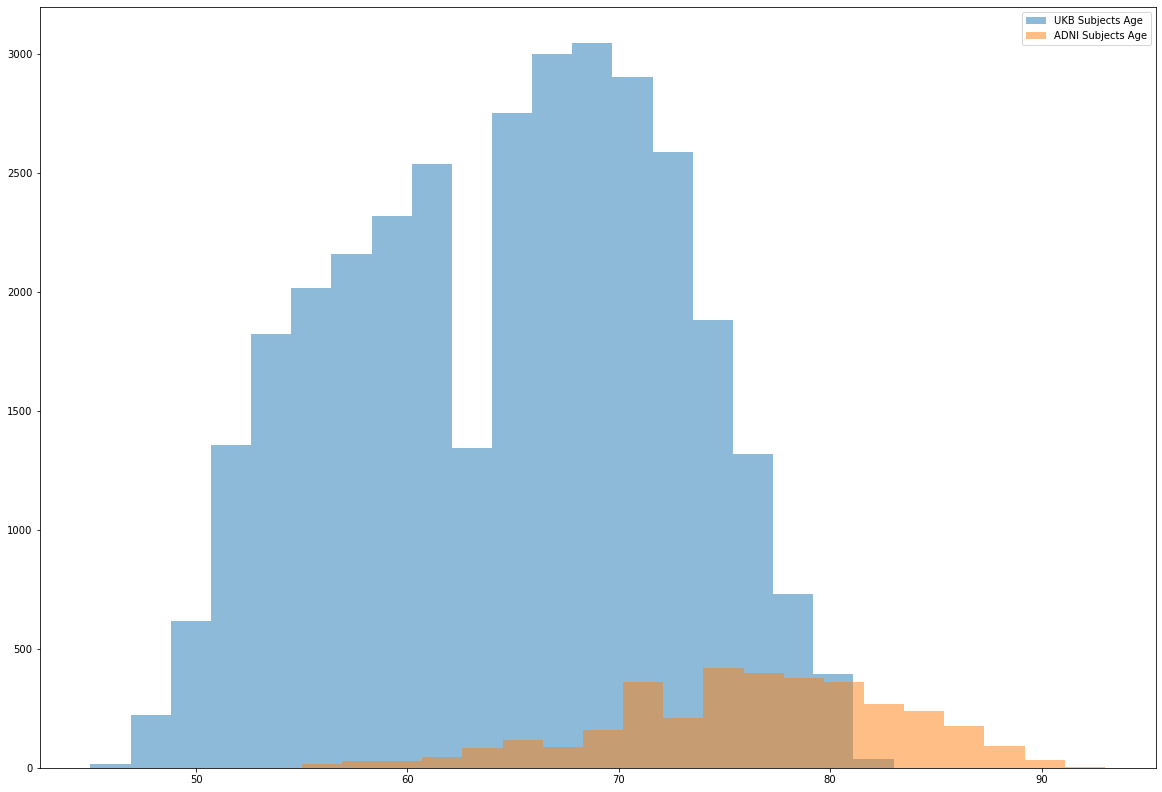

In [73]:
import numpy
from matplotlib import pyplot
pyplot.hist(ukb_age, bins=20, alpha=0.5, label='UKB Subjects Age')
pyplot.hist(adni_age, bins=20, alpha=0.5, label='ADNI Subjects Age')
pyplot.legend(loc='upper right')
pyplot.show()

<AxesSubplot:ylabel='Frequency'>

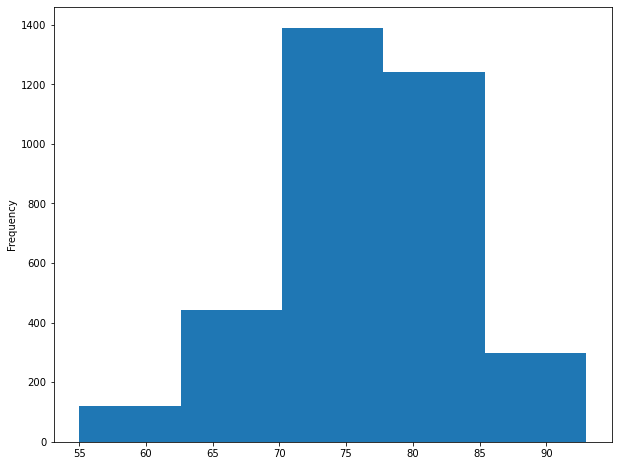

In [7]:
unharmonized_df[unharmonized_df.Dataset=="ADNI"]['Age'].plot(kind='hist',bins=5)

<AxesSubplot:ylabel='Frequency'>

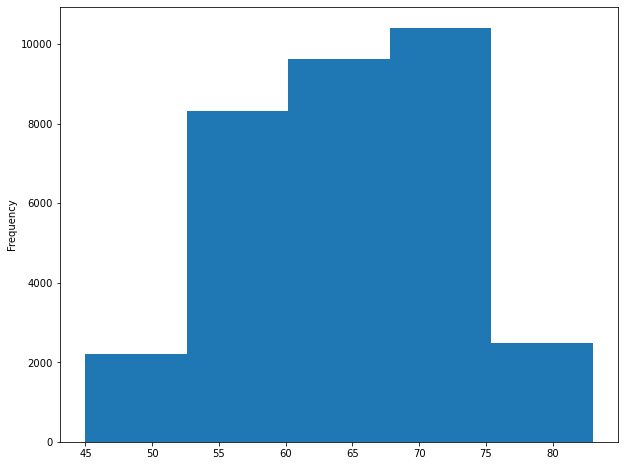

In [8]:
unharmonized_df[unharmonized_df.Dataset=="UKB"]['Age'].plot(kind='hist',bins=5)

In [9]:
len(ukb_age),len(adni_age)

(33051, 3493)

In [10]:
unharmonized_df['Subject_ID'].nunique()

31848

In [11]:
list(unharmonized_df.columns)

['Subject_ID',
 'Group',
 'Sex',
 'Age',
 'Date_of_Brain_Scan',
 'Scanner_Proxy',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_super

In [12]:
# changes = {}
# for colname in unharmonized_df.columns:
#     if ' ' in colname or '-' in colname:
#         changes[colname] = colname.replace(' ', '_').replace('-', '_')
# unharmonized_df=unharmonized_df.rename(changes, axis=1)

In [13]:
unharmonized_df.describe(percentiles=[])

,Age,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,...,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,MaskVol,BrainSegVol_to_eTIV,MaskVol_to_eTIV,EstimatedTotalIntraCranialVol
count,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,...,36544.000000,36544.000000,36544.000000,36544.000000,3.654400e+04,3.654400e+04,3.654400e+04,36544.000000,36544.000000,3.654400e+04
mean,65.700881,2.625382,2.568427,2.793337,1.939838,3.202187,2.866051,2.622065,2.940542,2.403321,...,237352.066077,473679.481903,54622.893854,653847.231096,1.049010e+06,1.017844e+06,1.602946e+06,0.770266,1.035680,1.548813e+06
std,8.372926,0.223376,0.432620,0.222067,0.162502,0.355126,0.201737,0.197058,0.203236,0.220225,...,29718.496145,58985.845711,5080.265135,66997.067739,1.116659e+05,1.103677e+05,1.566609e+05,0.041484,0.033131,1.557037e+05
min,45.000000,1.397000,0.666000,1.468000,1.314000,1.022000,1.585000,1.481000,1.732000,1.439000,...,144370.000000,292836.000000,24316.000000,368003.916700,5.647510e+05,5.445970e+05,1.109912e+06,0.210131,0.275478,6.431333e+05
50%,66.000000,2.647000,2.609000,2.830000,1.941000,3.240000,2.901000,2.659000,2.970000,2.412000,...,235881.211484,470756.458303,54481.000000,653683.198858,1.044081e+06,1.014453e+06,1.596861e+06,0.774580,1.033500,1.541079e+06
max,93.000000,3.353000,3.962000,3.440000,2.623000,4.282000,3.423000,3.217000,3.540000,3.233000,...,395922.000000,758328.000000,81896.000000,967825.239735,1.515658e+06,1.470443e+06,2.231729e+06,1.839838,2.425884,5.740888e+06


In [14]:
def make_box_plot(df, x, y):
    '''Creates a simple box plot for data in a dataframe. x should be discrete, y continuous'''
    xkeys = df[x].unique()
    data=[]
    for key in xkeys:
        data.append(df[df[x] == key][y])

    plt.boxplot(data, labels=xkeys)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)


def make_box_plot2x(df, x, y):
    '''Creates a simple box plot for data in a dataframe. 2 x variables should be discrete, y continuous'''
    xkeys0 = df[x[0]].unique()
    xkeys1 = df[x[1]].unique()
    data=[]
    labels=[]
    for key0 in xkeys0:
        for key1 in xkeys1:
            data.append(df[(df[x[0]] == key0) & (df[x[1]] == key1)][y])
            labels.append(key0 + ' ' + key1)
    plt.boxplot(data, labels=labels)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    
def make_box_plot3x(df, x, y):
    '''Creates a simple box plot for data in a dataframe. 3 x variables should be discrete, y continuous'''
    xkeys0 = df[x[0]].unique()
    xkeys1 = df[x[1]].unique()
    xkeys2 = df[x[2]].unique()
    data=[]
    labels=[]
    for key0 in xkeys0:
        for key1 in xkeys1:
            for key2 in xkeys2:
#                 print(df[(df[x[0]] == key0) & (df[x[1]] == key1) & (df[x[2]] == key2)][y])
                data.append(df[(df[x[0]] == key0) & (df[x[1]] == key1) & (df[x[2]] == key2)][y])
                labels.append(key0 + ' ' + key1 + '  '+ key2+"\n n="+str(df[(df[x[0]] == key0) & (df[x[1]] == key1) & (df[x[2]] == key2)].shape[0]))
    plt.boxplot(data, labels=labels)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    
def set_age_flag(age):
    
    if age < 1954:
        return "OTV"
    else:
        return "YTV"

In [15]:
#unharmonized_df['GAvg_age'] = unharmonized_df['Year_of_Birth'].apply(lambda x: set_age_flag(x))

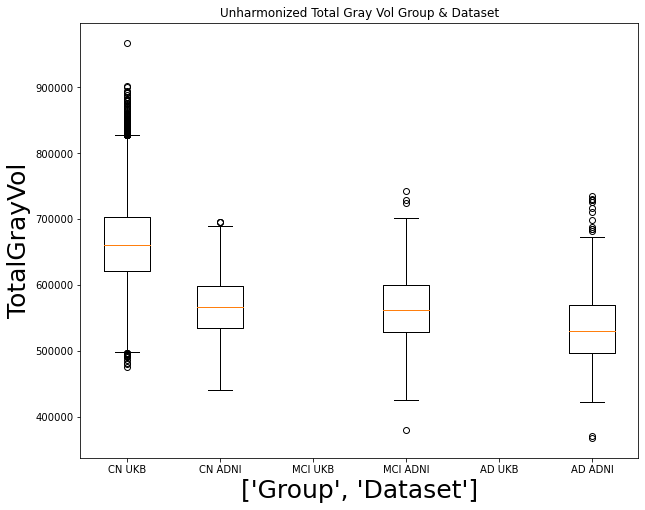

In [75]:
plt.title("Unharmonized Total Gray Vol Group & Dataset")
plt.rcParams['figure.figsize'] = (15,8)
make_box_plot2x(unharmonized_df, ['Group','Dataset'], 'TotalGrayVol')

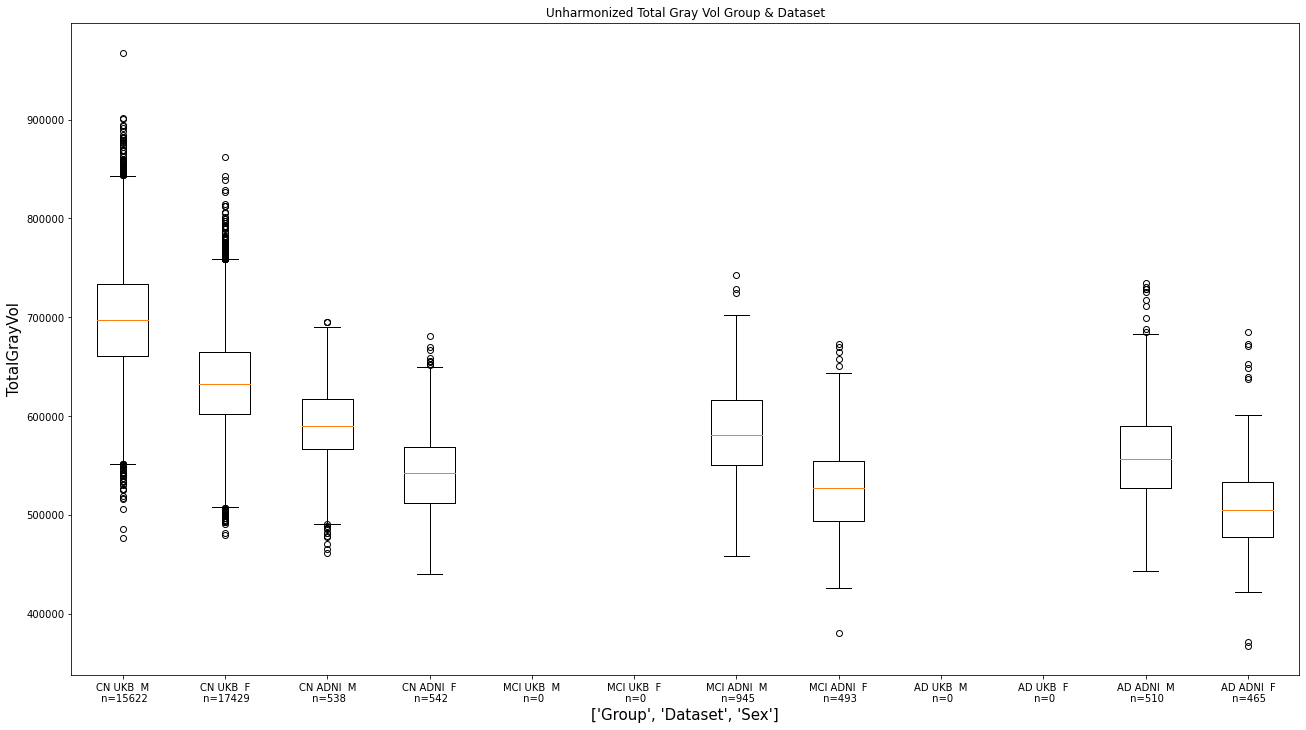

In [68]:
plt.title("Unharmonized Total Gray Vol Group & Dataset")
plt.rcParams['figure.figsize'] = (25,8)
make_box_plot3x(unharmonized_df,['Group','Dataset','Sex'], 'TotalGrayVol')

In [18]:
unharmonized_df['Scanner_Proxy'].nunique()

86

Text(0.5, 1.0, 'Unharmonized Left_Hippocampus values across Groups, Gender and Dataset Type')

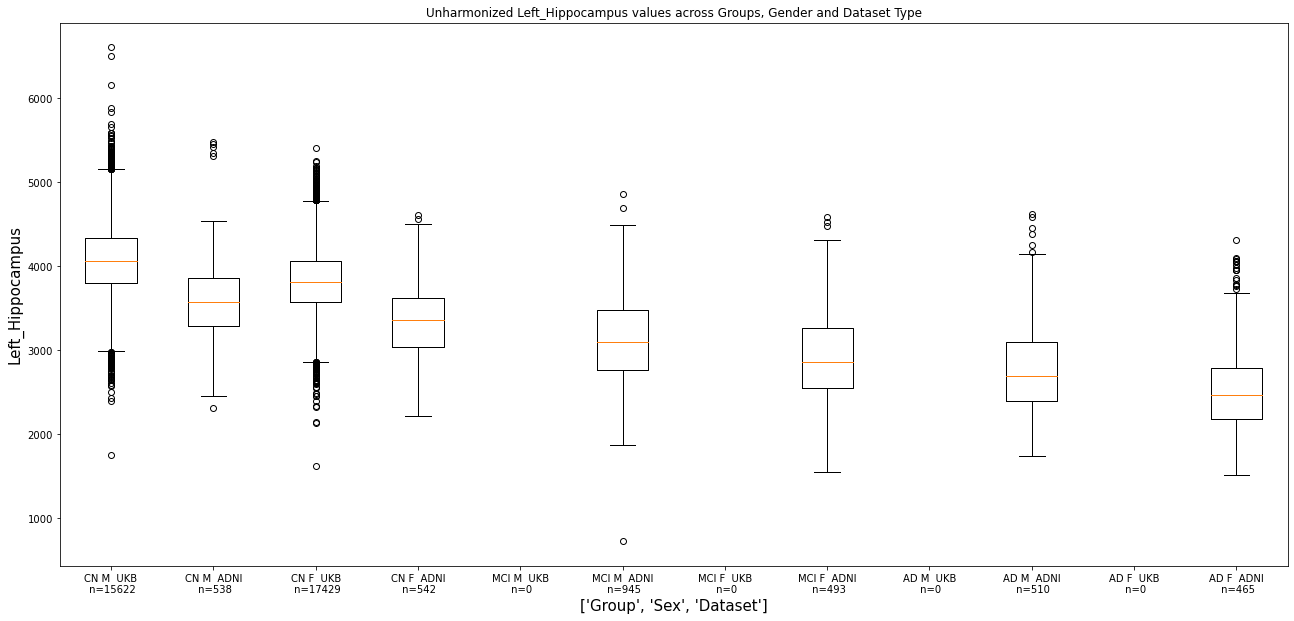

In [69]:
plt.rcParams['figure.figsize'] = (22,10)
make_box_plot3x(unharmonized_df, ['Group', 'Sex','Dataset'], 'Left_Hippocampus')
plt.title("Unharmonized Left_Hippocampus values across Groups, Gender and Dataset Type")

Text(0.5, 1.0, 'unharmonized lh_MeanThickness_thickness Across Group, Gender & Dataset')

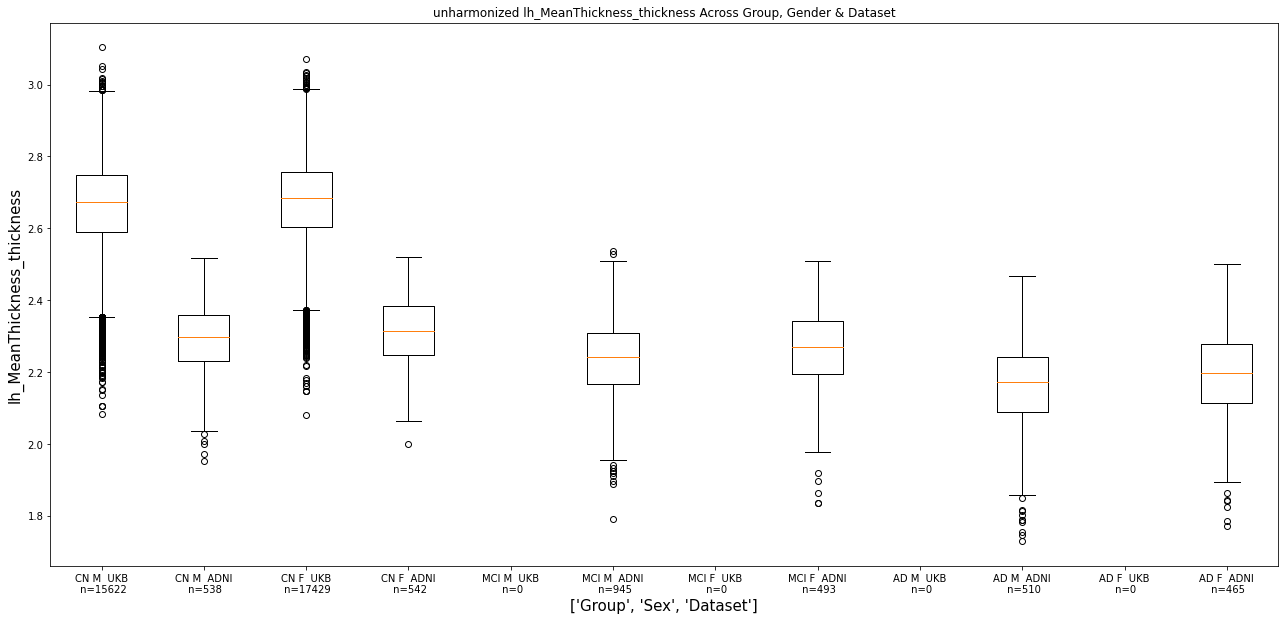

In [20]:
plt.rcParams['figure.figsize'] = (22,10)
make_box_plot3x(unharmonized_df, ['Group', 'Sex','Dataset'], 'lh_MeanThickness_thickness')
plt.title("unharmonized lh_MeanThickness_thickness Across Group, Gender & Dataset")

In [21]:
unharmonized_df.columns[7:129]

Index(['lh_caudalanteriorcingulate_thickness',
       'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness',
       'lh_entorhinal_thickness', 'lh_fusiform_thickness',
       'lh_inferiorparietal_thickness', 'lh_inferiortemporal_thickness',
       'lh_isthmuscingulate_thickness', 'lh_lateraloccipital_thickness',
       'lh_lateralorbitofrontal_thickness',
       ...
       'CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior',
       'CC_Anterior', 'BrainSegVol', 'BrainSegVolNotVent', 'lhCortexVol',
       'rhCortexVol', 'CortexVol'],
      dtype='object', length=122)

In [22]:
imaging_features=list(unharmonized_df.columns[7:129])

In [23]:
harmonized_df = pd.read_csv('adni_ukb_harmonized_04_19_2022.csv')

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
harmonized_df.head(5)

,Unnamed: 0,data_combat.Subject_ID,data_combat.Date_of_Brain_Scan,data_combat.Scanner_Proxy,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,data_combat.lh_entorhinal_thickness.combat,data_combat.lh_fusiform_thickness.combat,...,data_combat.rhCerebralWhiteMatterVol.combat,data_combat.CerebralWhiteMatterVol.combat,data_combat.SubCortGrayVol.combat,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol_to_eTIV.combat,data_combat.MaskVol_to_eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat
0,1,1000295,10/27/17,Newcastle,2.299373,1.178016,2.287103,2.016386,3.027922,2.889670,...,355771.080853,715722.187933,85817.959195,823955.554473,1.405024e+06,1.366983e+06,1.977764e+06,0.967584,1.202698,1.584354e+06
1,2,1000397,3/7/18,Newcastle,2.503140,2.950437,2.996597,1.888863,3.623515,2.938641,...,229635.383872,457205.498519,53154.338046,640662.044816,1.041020e+06,9.958223e+05,1.566572e+06,0.774727,1.032757,1.517181e+06
2,3,1000432,7/14/18,Cheadle,2.737478,3.281952,2.779994,1.967534,3.182034,2.936833,...,253419.027393,509236.303115,55475.078994,669298.568089,1.086424e+06,1.059269e+06,1.617140e+06,0.831640,1.081098,1.500149e+06
3,4,1000591,7/9/19,Reading,2.782031,2.329985,3.099483,2.080185,3.255097,3.032491,...,277871.889471,555717.486172,64512.774485,755549.214168,1.205461e+06,1.181405e+06,1.834423e+06,0.806231,1.086501,1.699154e+06
4,5,1000882,11/16/17,Cheadle,2.451791,2.751639,2.997359,1.808021,3.318435,2.786587,...,327826.552402,652025.621168,66281.529169,745162.803822,1.298829e+06,1.271995e+06,1.866079e+06,0.789931,1.011268,1.841840e+06


In [25]:
harmonized_df = harmonized_df.drop('Unnamed: 0', 1)

In [26]:
harmonized_df.columns

Index(['data_combat.Subject_ID', 'data_combat.Date_of_Brain_Scan',
       'data_combat.Scanner_Proxy', 'data_combat.lh_bankssts_thickness.combat',
       'data_combat.lh_caudalanteriorcingulate_thickness.combat',
       'data_combat.lh_caudalmiddlefrontal_thickness.combat',
       'data_combat.lh_cuneus_thickness.combat',
       'data_combat.lh_entorhinal_thickness.combat',
       'data_combat.lh_fusiform_thickness.combat',
       'data_combat.lh_inferiorparietal_thickness.combat',
       ...
       'data_combat.rhCerebralWhiteMatterVol.combat',
       'data_combat.CerebralWhiteMatterVol.combat',
       'data_combat.SubCortGrayVol.combat', 'data_combat.TotalGrayVol.combat',
       'data_combat.SupraTentorialVol.combat',
       'data_combat.SupraTentorialVolNotVent.combat',
       'data_combat.MaskVol.combat', 'data_combat.BrainSegVol_to_eTIV.combat',
       'data_combat.MaskVol_to_eTIV.combat',
       'data_combat.EstimatedTotalIntraCranialVol.combat'],
      dtype='object', length=132

In [27]:
harmonized_df.shape

(36544, 132)

In [28]:
unharmonized_df.shape

(36544, 141)

In [29]:
harmonized_df.head(5)

,data_combat.Subject_ID,data_combat.Date_of_Brain_Scan,data_combat.Scanner_Proxy,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,data_combat.lh_entorhinal_thickness.combat,data_combat.lh_fusiform_thickness.combat,data_combat.lh_inferiorparietal_thickness.combat,...,data_combat.rhCerebralWhiteMatterVol.combat,data_combat.CerebralWhiteMatterVol.combat,data_combat.SubCortGrayVol.combat,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol_to_eTIV.combat,data_combat.MaskVol_to_eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat
0,1000295,10/27/17,Newcastle,2.299373,1.178016,2.287103,2.016386,3.027922,2.889670,2.508926,...,355771.080853,715722.187933,85817.959195,823955.554473,1.405024e+06,1.366983e+06,1.977764e+06,0.967584,1.202698,1.584354e+06
1,1000397,3/7/18,Newcastle,2.503140,2.950437,2.996597,1.888863,3.623515,2.938641,2.800982,...,229635.383872,457205.498519,53154.338046,640662.044816,1.041020e+06,9.958223e+05,1.566572e+06,0.774727,1.032757,1.517181e+06
2,1000432,7/14/18,Cheadle,2.737478,3.281952,2.779994,1.967534,3.182034,2.936833,2.647389,...,253419.027393,509236.303115,55475.078994,669298.568089,1.086424e+06,1.059269e+06,1.617140e+06,0.831640,1.081098,1.500149e+06
3,1000591,7/9/19,Reading,2.782031,2.329985,3.099483,2.080185,3.255097,3.032491,2.596970,...,277871.889471,555717.486172,64512.774485,755549.214168,1.205461e+06,1.181405e+06,1.834423e+06,0.806231,1.086501,1.699154e+06
4,1000882,11/16/17,Cheadle,2.451791,2.751639,2.997359,1.808021,3.318435,2.786587,2.656467,...,327826.552402,652025.621168,66281.529169,745162.803822,1.298829e+06,1.271995e+06,1.866079e+06,0.789931,1.011268,1.841840e+06


In [30]:
harmonized_df.index=unharmonized_df.index
all_merged = unharmonized_df.join(harmonized_df)

In [77]:
#gray_vol_df=all_merged

gmv_adni_df=all_merged[(all_merged.Dataset=="ADNI") & (all_merged.Group=="CN")][['Age','data_combat.TotalGrayVol.combat']]
gmv_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','data_combat.TotalGrayVol.combat']]

In [32]:
list(all_merged.columns)

['Subject_ID',
 'Group',
 'Sex',
 'Age',
 'Date_of_Brain_Scan',
 'Scanner_Proxy',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_super

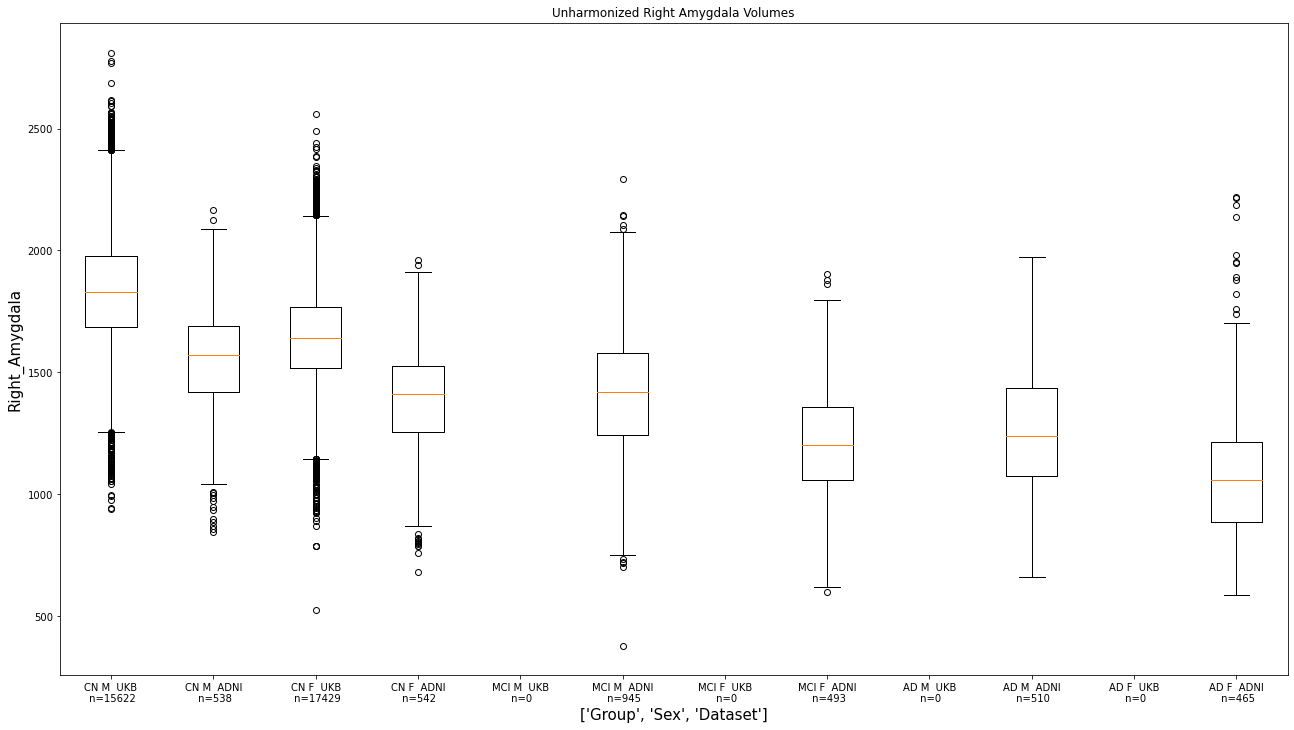

In [70]:
plt.rcParams['figure.figsize'] = (22,12)
plt.title("Unharmonized Right Amygdala Volumes")
make_box_plot3x(all_merged, ['Group','Sex', 'Dataset'], 'Right_Amygdala')

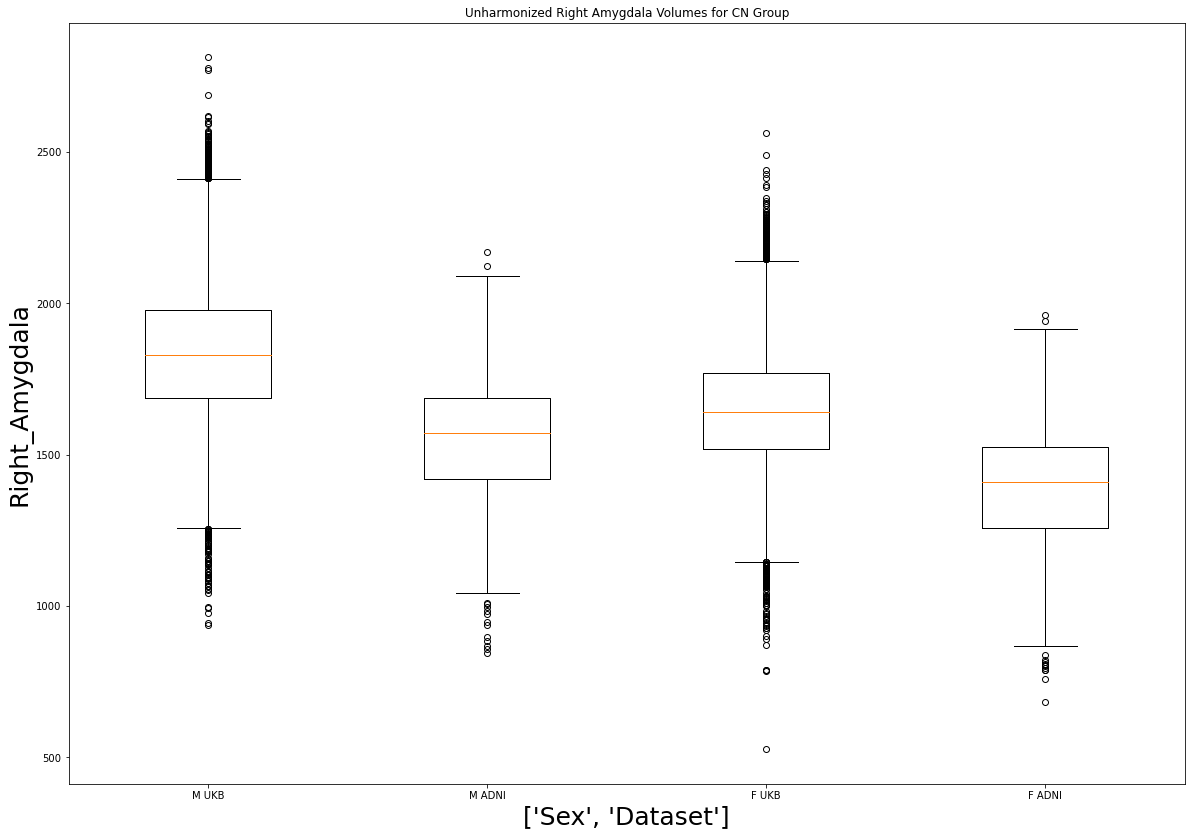

In [72]:
plt.rcParams['figure.figsize'] = (20,14)
plt.title("Unharmonized Right Amygdala Volumes for CN Group")
make_box_plot2x(unharmonized_df[unharmonized_df['Group'] == 'CN'], ['Sex', 'Dataset'], 'Right_Amygdala')

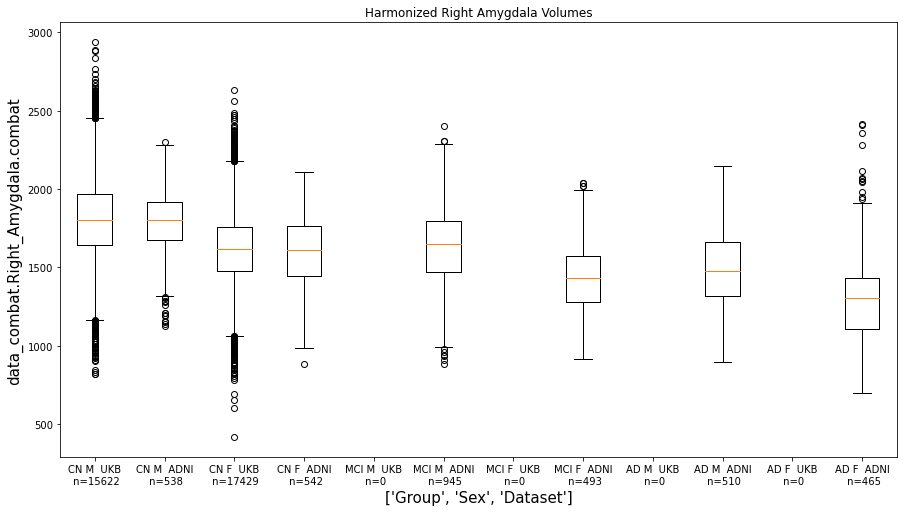

In [35]:
plt.rcParams['figure.figsize'] = (15,8)
plt.title("Harmonized Right Amygdala Volumes")
make_box_plot3x(all_merged, ['Group','Sex', 'Dataset'], 'data_combat.Right_Amygdala.combat')

Text(0.5, 0, 'Group, Sex, Dataset')

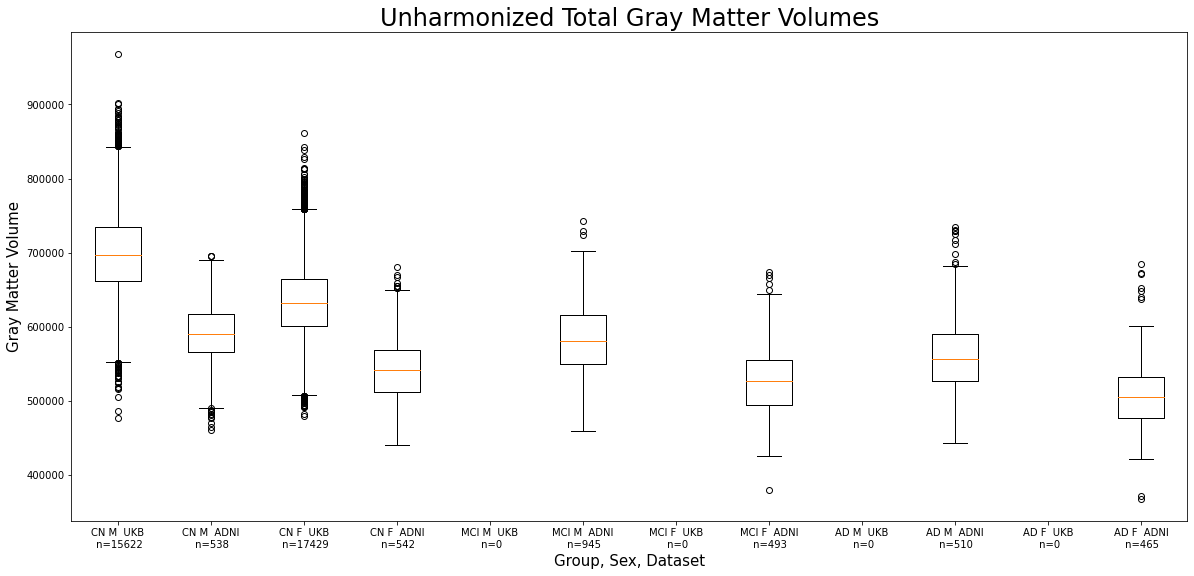

In [36]:
plt.rcParams['figure.figsize'] = (20,9)
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'TotalGrayVol')
plt.title("Unharmonized Total Gray Matter Volumes", fontsize = 24)
plt.ylabel('Gray Matter Volume')
plt.xlabel('Group, Sex, Dataset')
# plt.axvline(2.5, color = 'gray', ls = '--')
# plt.axvline(4.5, color = 'gray', ls = '--')
# plt.axvline(6.5, color = 'gray', ls = '--')

Text(0.5, 0, 'GAvg_age, Sex, Assesment_Centre')

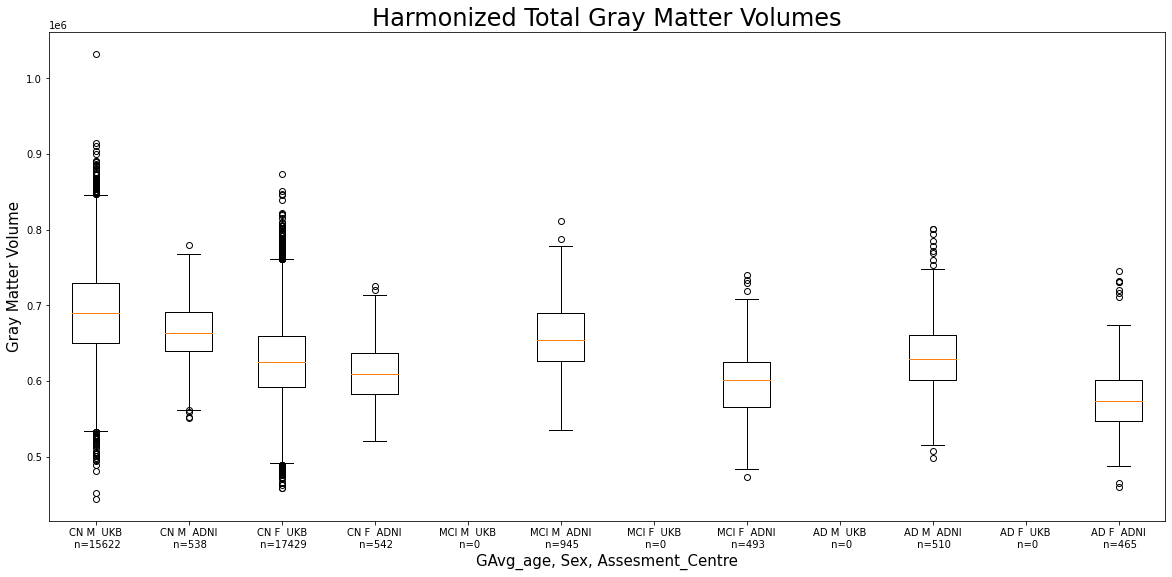

In [37]:
plt.rcParams['figure.figsize'] = (20,9)
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'data_combat.TotalGrayVol.combat')
plt.title("Harmonized Total Gray Matter Volumes", fontsize = 24)
plt.ylabel('Gray Matter Volume')
plt.xlabel('GAvg_age, Sex, Assesment_Centre')
# plt.axvline(2.5, color = 'gray', ls = '--')
# plt.axvline(4.5, color = 'gray', ls = '--')
# plt.axvline(6.5, color = 'gray', ls = '--')

Text(0.5, 1.0, 'Unharmonized')

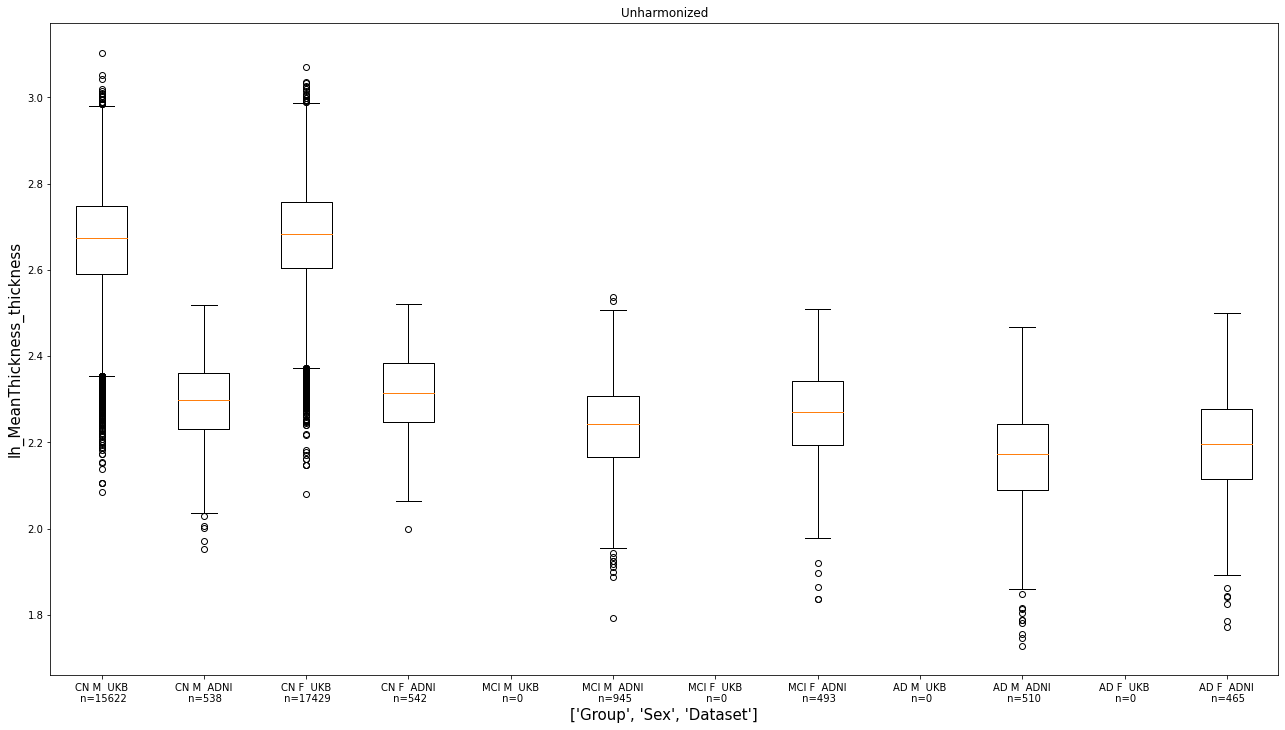

In [38]:
plt.rcParams['figure.figsize'] = (22,12)
plt.title("Unharmonized lh_MeanThickness_thickness")
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'lh_MeanThickness_thickness')
plt.title("Unharmonized")

Text(0.5, 1.0, 'harmonized lh mean thickness')

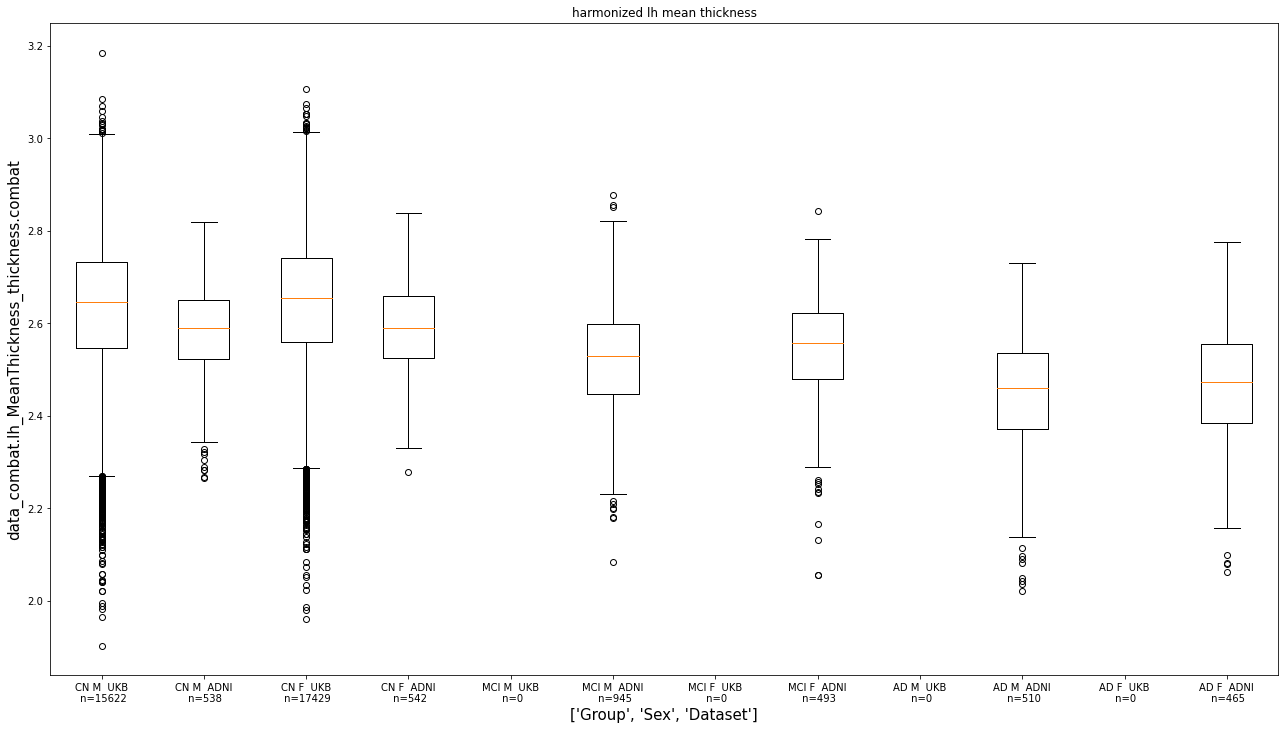

In [39]:
plt.rcParams['figure.figsize'] = (22,12)
plt.title("Harmonized lh_MeanThickness_thickness")
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'data_combat.lh_MeanThickness_thickness.combat')
plt.title("harmonized lh mean thickness")

Text(0.5, 1.0, 'LH Entorhinal Thickness')

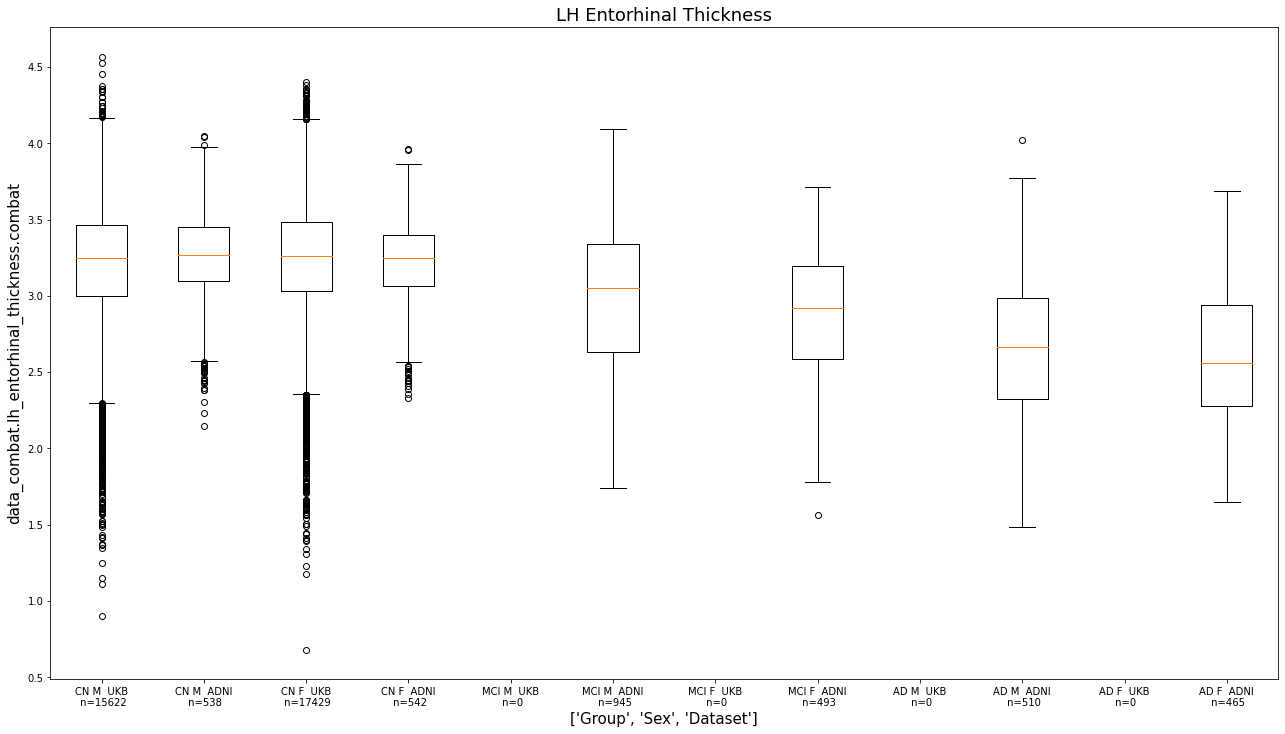

In [40]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.lh_entorhinal_thickness.combat')
plt.title('LH Entorhinal Thickness', fontsize=18)

Text(0.5, 1.0, 'RH Entorhinal Thickness')

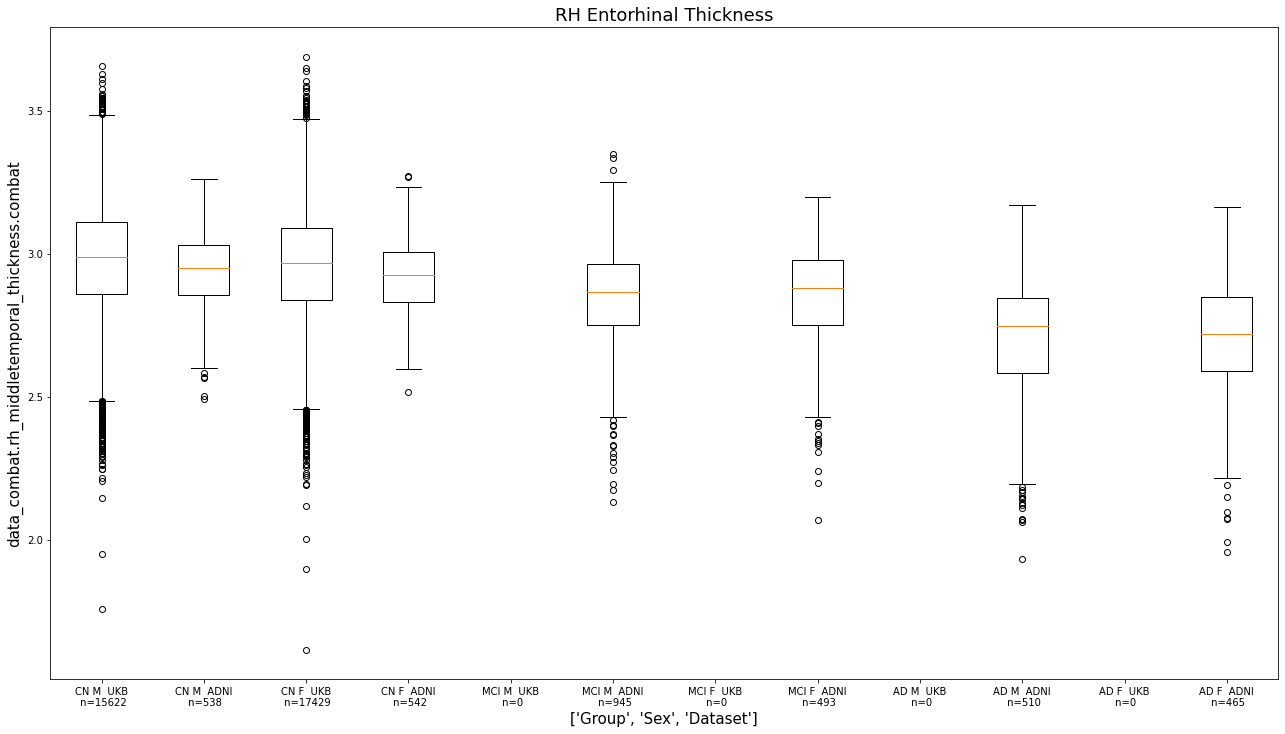

In [41]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.rh_middletemporal_thickness.combat')
plt.title('RH Entorhinal Thickness', fontsize=18)

Text(0.5, 1.0, 'Left_Hippocampus Volume')

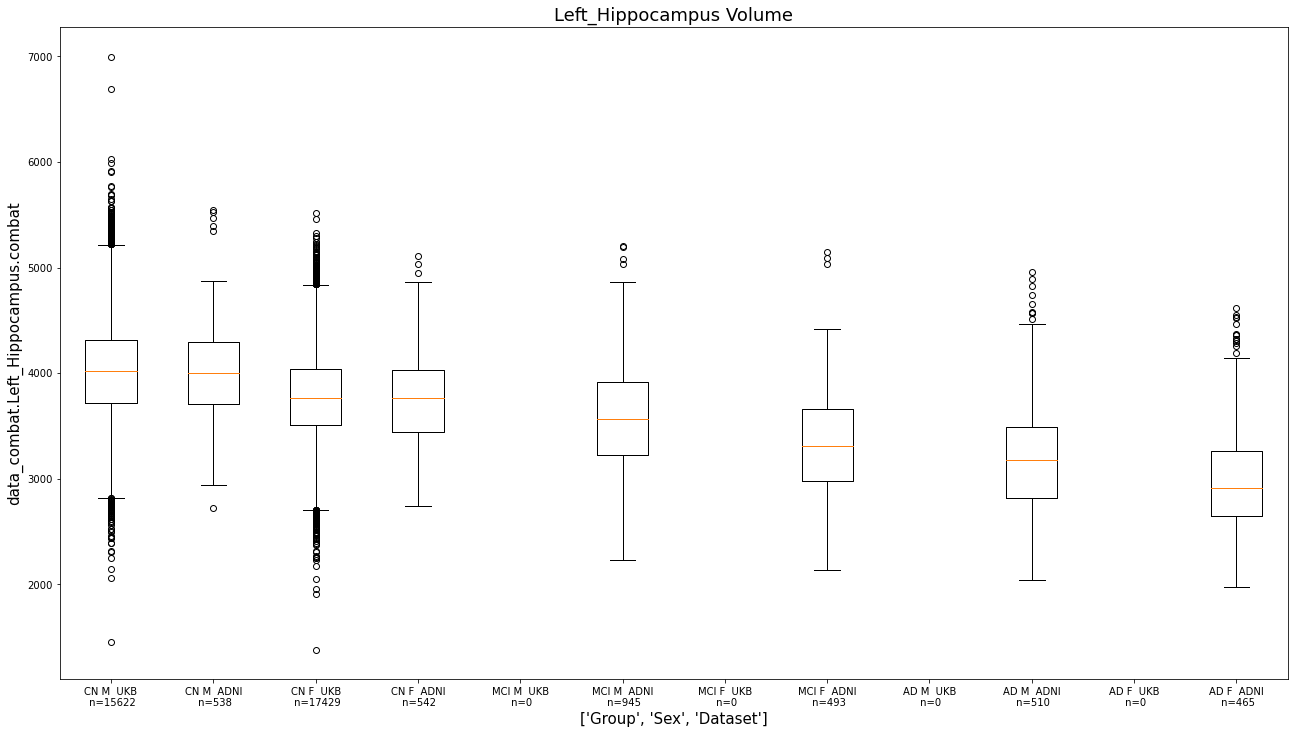

In [42]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.Left_Hippocampus.combat')
plt.title('Left_Hippocampus Volume', fontsize=18)

Text(0.5, 1.0, 'Right_Amygdala Volume')

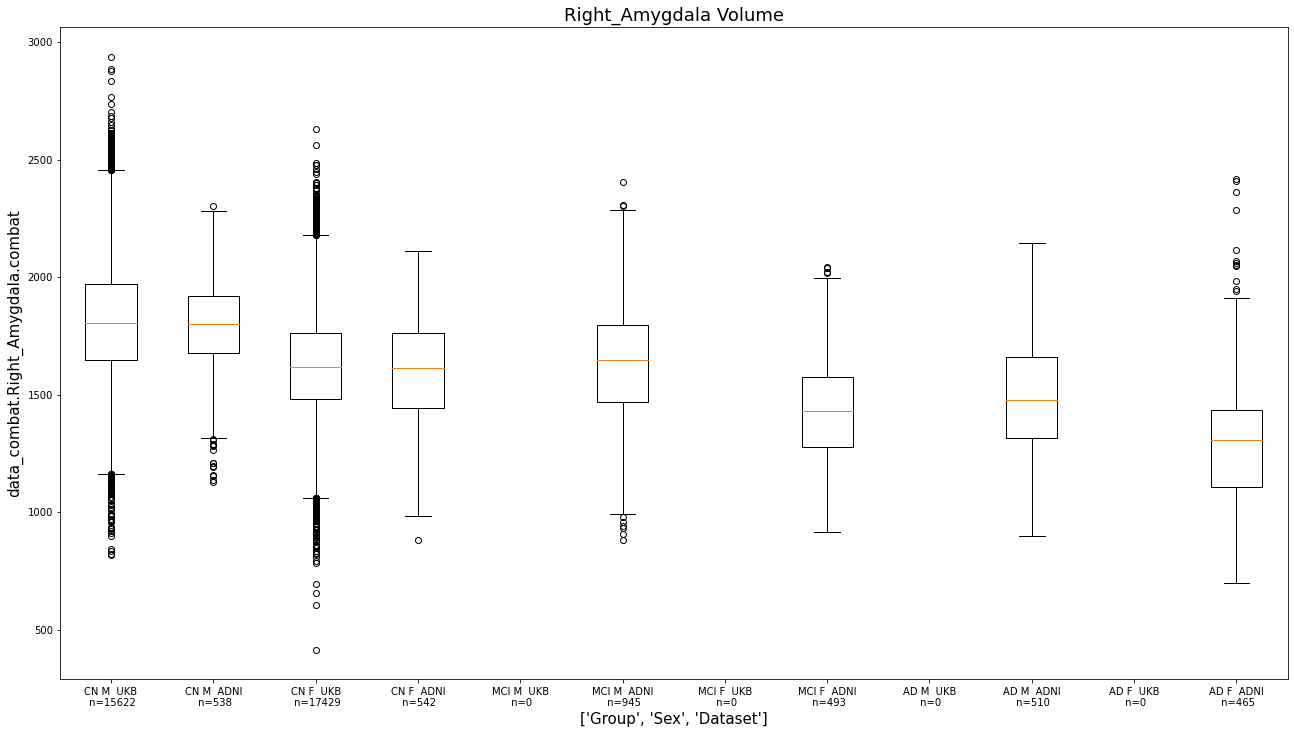

In [43]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.Right_Amygdala.combat')
plt.title('Right_Amygdala Volume', fontsize=18)

Text(0.5, 1.0, 'Left_Thalamus Volume')

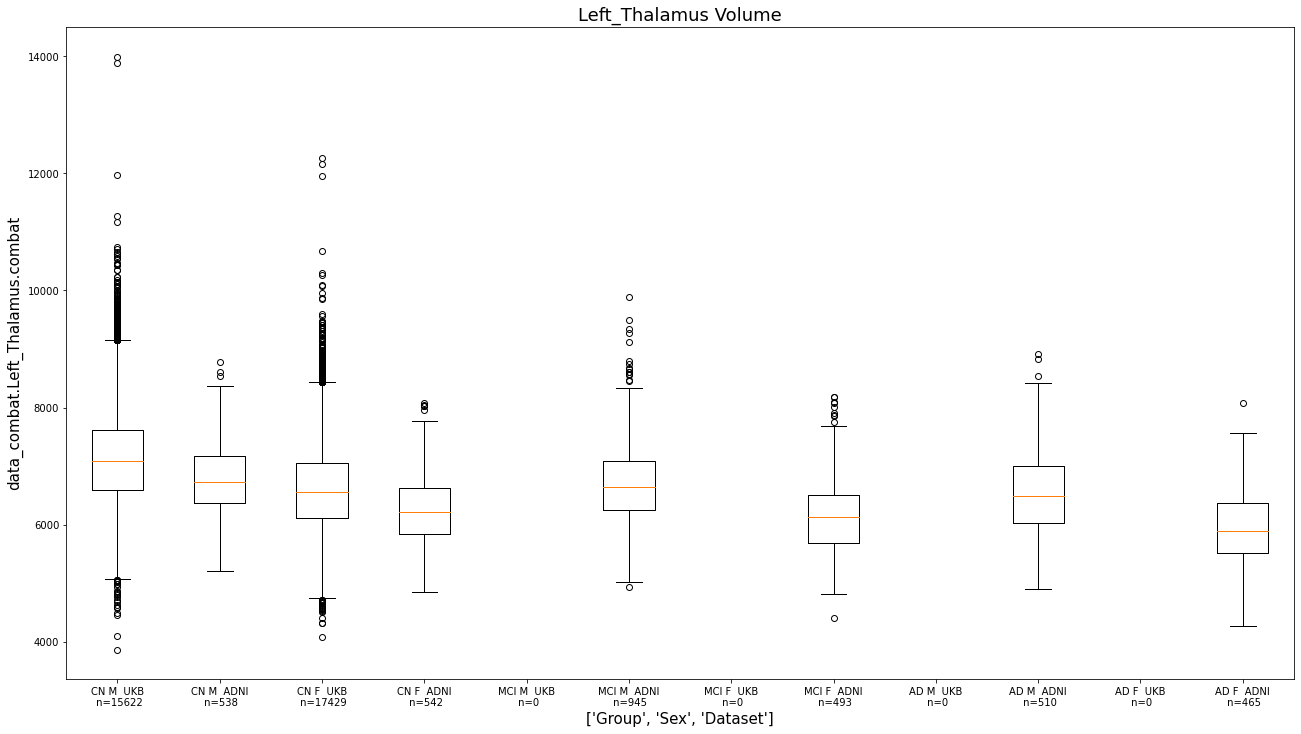

In [44]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.Left_Thalamus.combat')
plt.title('Left_Thalamus Volume', fontsize=18)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
colors = np.random.rand(2)

In [46]:
all_merged.columns

Index(['Subject_ID', 'Group', 'Sex', 'Age', 'Date_of_Brain_Scan',
       'Scanner_Proxy', 'lh_bankssts_thickness',
       'lh_caudalanteriorcingulate_thickness',
       'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness',
       ...
       'data_combat.rhCerebralWhiteMatterVol.combat',
       'data_combat.CerebralWhiteMatterVol.combat',
       'data_combat.SubCortGrayVol.combat', 'data_combat.TotalGrayVol.combat',
       'data_combat.SupraTentorialVol.combat',
       'data_combat.SupraTentorialVolNotVent.combat',
       'data_combat.MaskVol.combat', 'data_combat.BrainSegVol_to_eTIV.combat',
       'data_combat.MaskVol_to_eTIV.combat',
       'data_combat.EstimatedTotalIntraCranialVol.combat'],
      dtype='object', length=273)

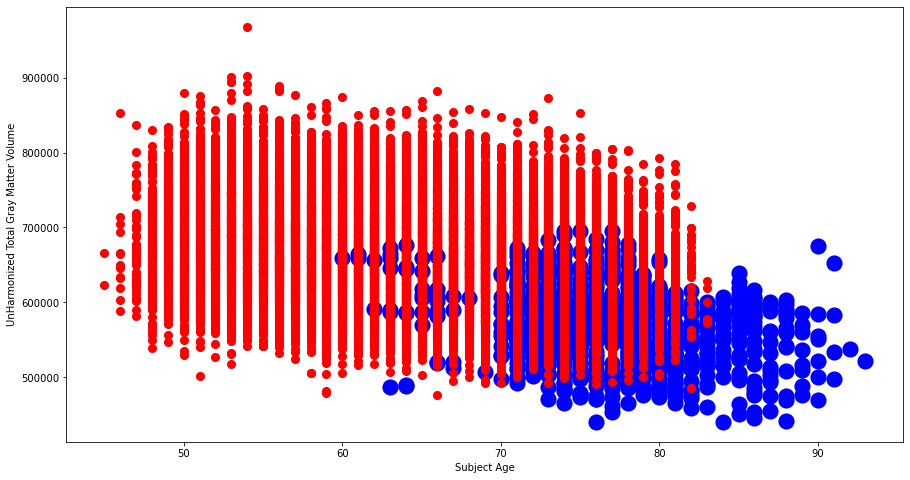

In [76]:
unharmonized_gmv_adni_df=all_merged[(all_merged.Dataset=="ADNI") & (all_merged.Group=="CN")][['Age','TotalGrayVol']]
unharmonized_gmv_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','TotalGrayVol']]

plt.scatter(unharmonized_gmv_adni_df.Age,unharmonized_gmv_adni_df['TotalGrayVol'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(unharmonized_gmv_ukb_df.Age, unharmonized_gmv_ukb_df['TotalGrayVol'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("UnHarmonized Total Gray Matter Volume")
plt.show()

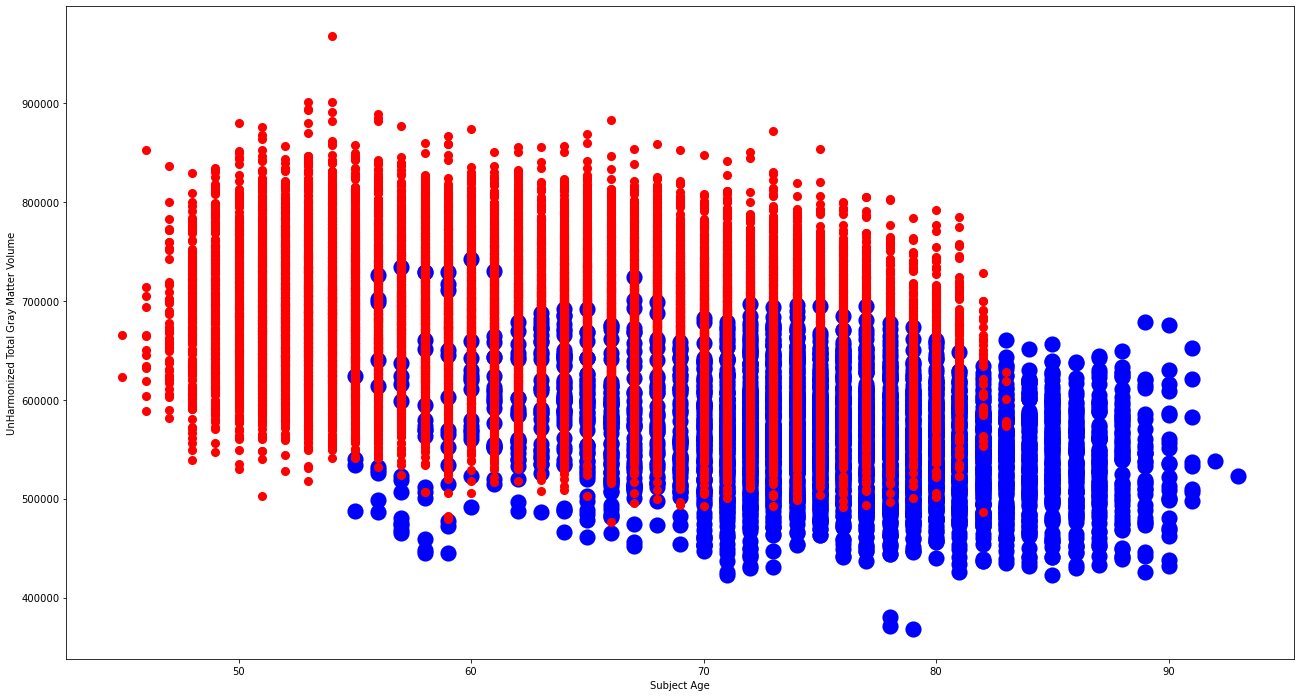

In [47]:
unharmonized_gmv_adni_df=all_merged[all_merged.Dataset=="ADNI"][['Age','TotalGrayVol']]
unharmonized_gmv_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','TotalGrayVol']]

plt.scatter(unharmonized_gmv_adni_df.Age,unharmonized_gmv_adni_df['TotalGrayVol'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(unharmonized_gmv_ukb_df.Age, unharmonized_gmv_ukb_df['TotalGrayVol'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("UnHarmonized Total Gray Matter Volume")
plt.show()

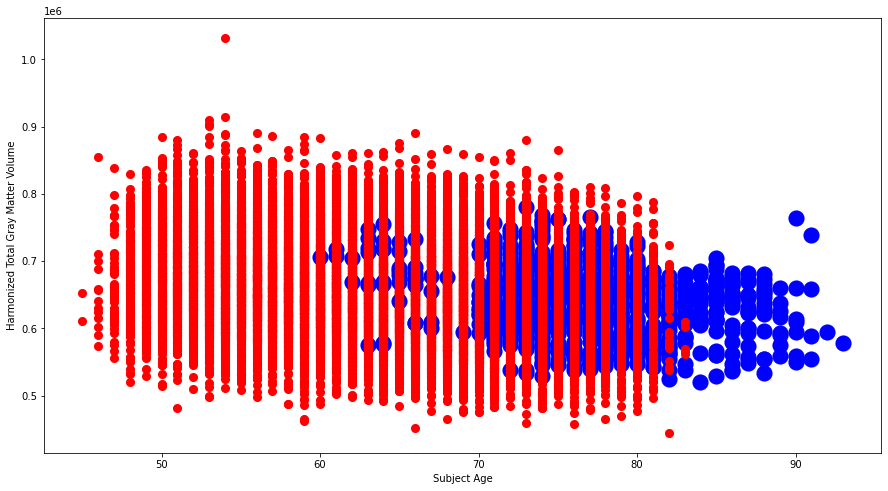

In [78]:
# gmv_adni_df,gmv_ukb_df
plt.scatter(gmv_adni_df.Age,gmv_adni_df['data_combat.TotalGrayVol.combat'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(gmv_ukb_df.Age, gmv_ukb_df['data_combat.TotalGrayVol.combat'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("Harmonized Total Gray Matter Volume")
plt.show()

In [49]:
lh_mean_adni_df=all_merged[all_merged.Dataset=="ADNI"][['Age','lh_MeanThickness_thickness','data_combat.lh_MeanThickness_thickness.combat']]     
lh_mean_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','lh_MeanThickness_thickness','data_combat.lh_MeanThickness_thickness.combat']]

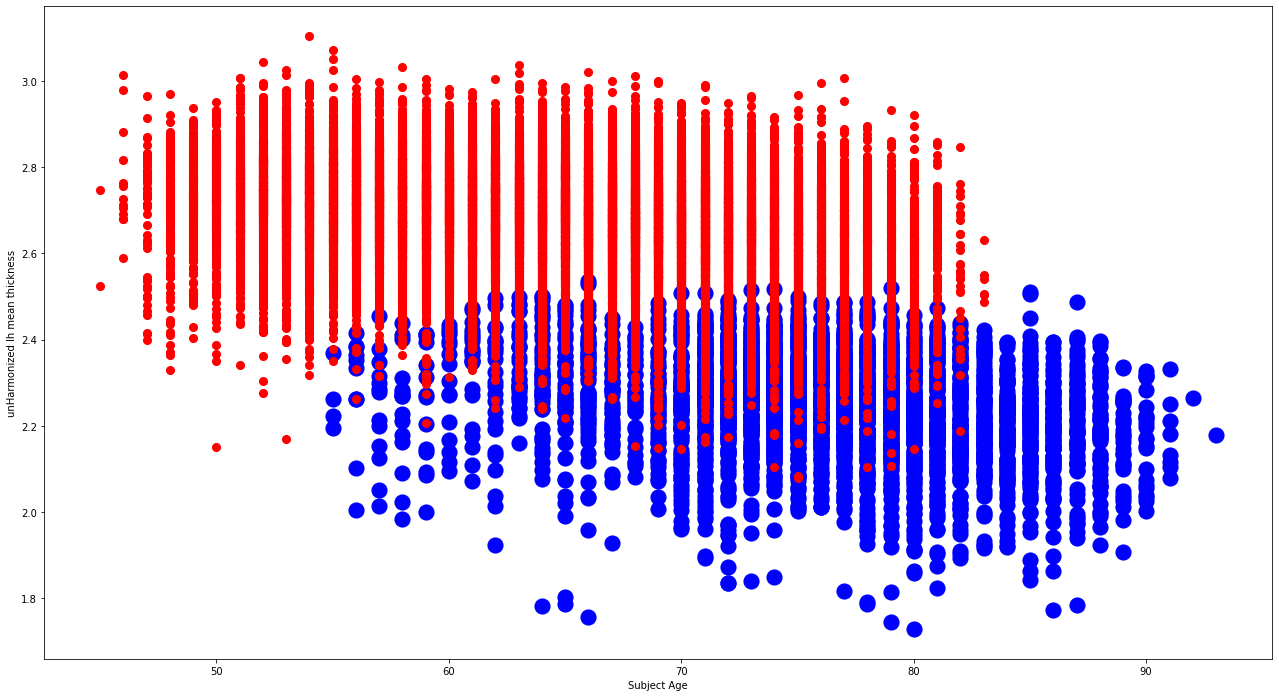

In [50]:
plt.scatter(lh_mean_adni_df.Age,lh_mean_adni_df['lh_MeanThickness_thickness'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(lh_mean_ukb_df.Age, lh_mean_ukb_df['lh_MeanThickness_thickness'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("unHarmonized lh mean thickness")
plt.show()

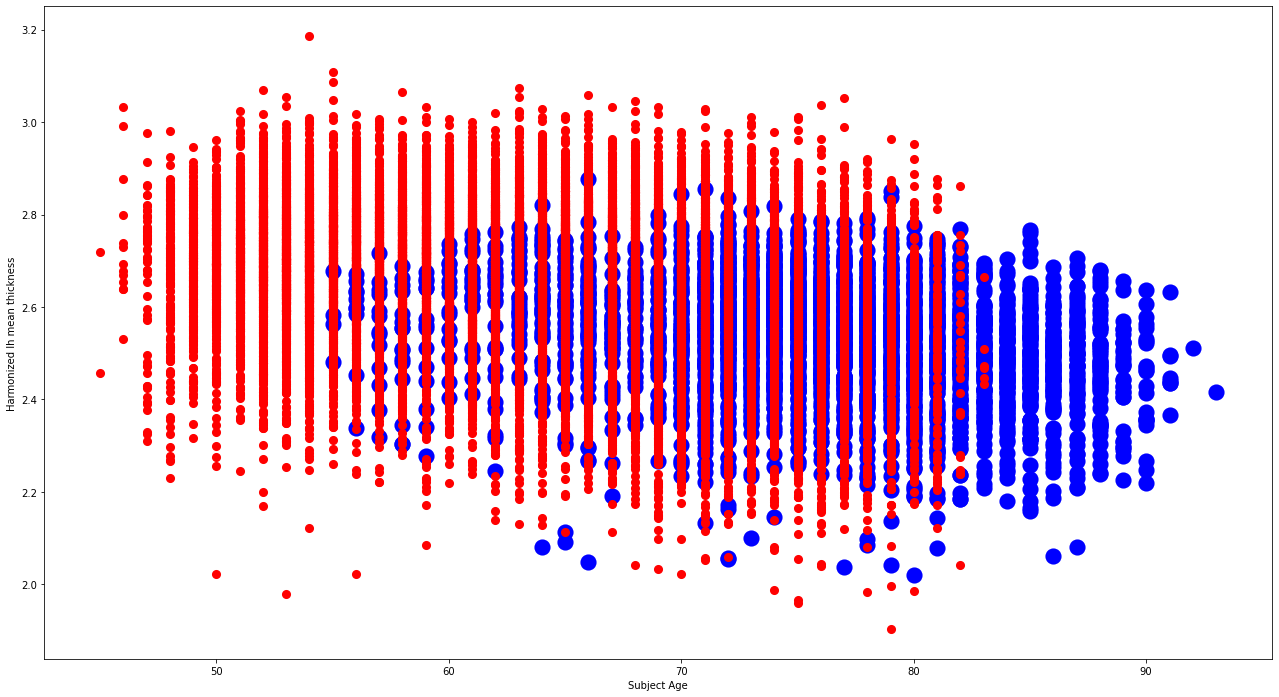

In [51]:
plt.scatter(lh_mean_adni_df.Age,lh_mean_adni_df['data_combat.lh_MeanThickness_thickness.combat'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(lh_mean_ukb_df.Age, lh_mean_ukb_df['data_combat.lh_MeanThickness_thickness.combat'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("Harmonized lh mean thickness")
plt.show()

In [52]:
rm_adni_df=all_merged[all_merged.Dataset=="ADNI"][['Age','Right_Amygdala','data_combat.Right_Amygdala.combat']]     
rm_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','Right_Amygdala','data_combat.Right_Amygdala.combat']]

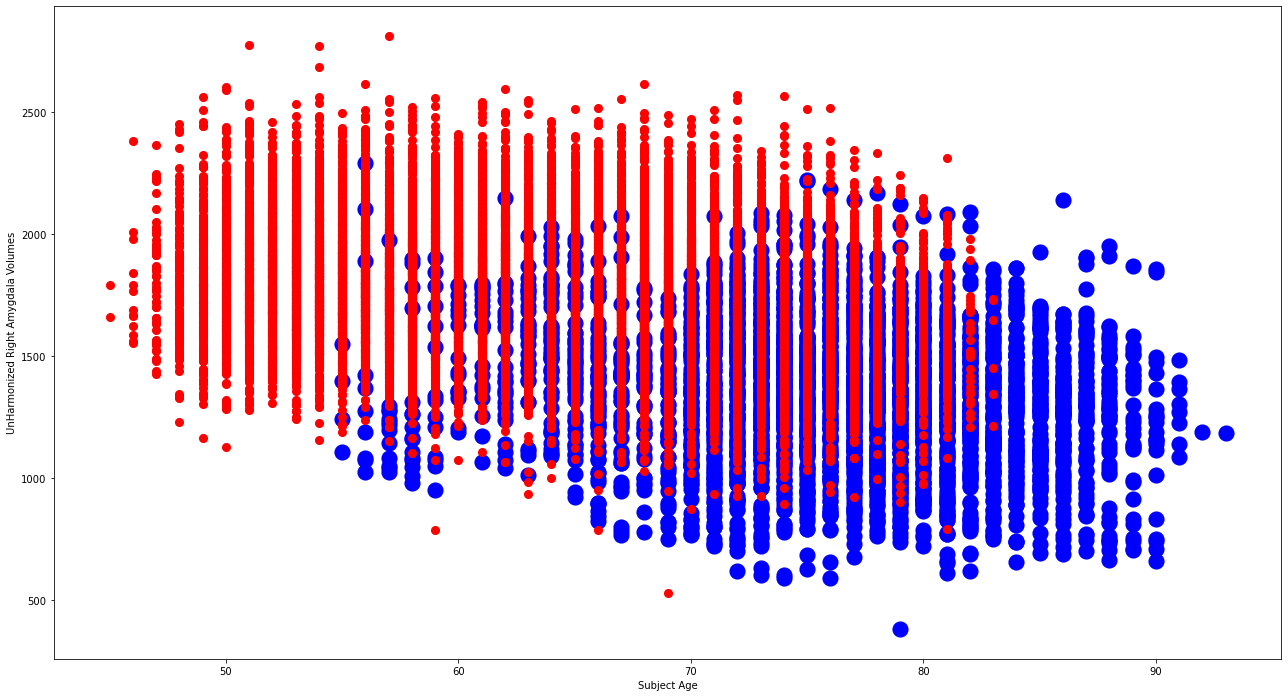

In [53]:
plt.scatter(rm_adni_df.Age,rm_adni_df['Right_Amygdala'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(rm_ukb_df.Age, rm_ukb_df['Right_Amygdala'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("UnHarmonized Right Amygdala Volumes")
plt.show()

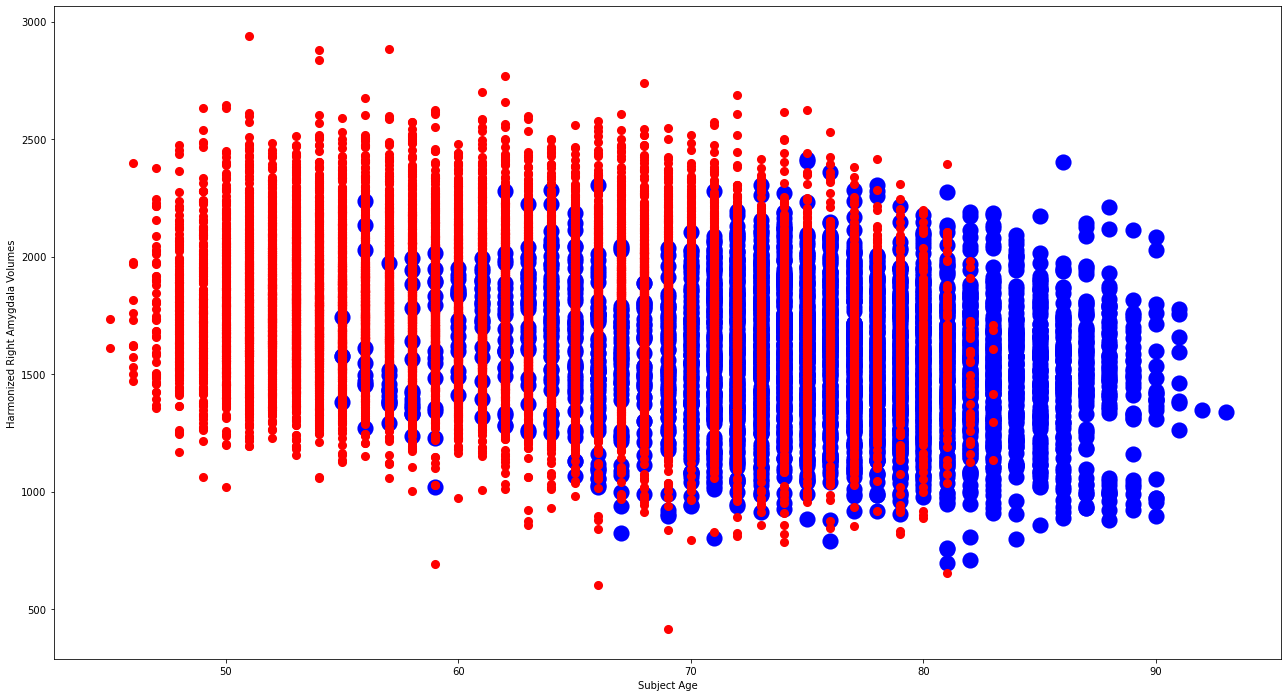

In [54]:
plt.scatter(rm_adni_df.Age,rm_adni_df['data_combat.Right_Amygdala.combat'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(rm_ukb_df.Age, rm_ukb_df['data_combat.Right_Amygdala.combat'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("Harmonized Right Amygdala Volumes")
plt.show()

In [55]:
#20023 Mean time to correctly identify matches
#20016 Fluid intelligence score
#4080 Blood_Pressure
relevant_cols=["eid","20016-0.0","20016-1.0","20016-2.0","20016-3.0","20023-0.0","20023-1.0","20023-2.0","20023-3.0","4080-0.0","4080-0.1","4080-1.0","4080-1.1","4080-2.0","4080-2.1","4080-3.0","4080-3.1"]
meta_data_df = pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb49570.csv", usecols = relevant_cols)

In [56]:
meta_data_df.shape

(502417, 17)

In [57]:
meta_data_df.columns

Index(['eid', '4080-0.0', '4080-0.1', '4080-1.0', '4080-1.1', '4080-2.0',
       '4080-2.1', '4080-3.0', '4080-3.1', '20016-0.0', '20016-1.0',
       '20016-2.0', '20016-3.0', '20023-0.0', '20023-1.0', '20023-2.0',
       '20023-3.0'],
      dtype='object')

In [58]:
brain_df=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb_brain_imaging_metadata.csv")

brain_imaging_subjects = list(brain_df['eid'].unique())

In [59]:
meta_data_df = meta_data_df[meta_data_df['eid'].isin(brain_imaging_subjects)]

In [60]:
meta_data_df.shape

(49400, 17)

In [61]:
changes = {}
for colname in meta_data_df.columns:
    if colname[:4] == "4080":
        changes[colname] = colname.replace('4080','Blood_Pressure')
    elif colname[:5] == "20016":
        changes[colname] = colname.replace('20016','Fluid_Intelligence_Score')
    elif colname[:5] == "20023":
        changes[colname] = colname.replace('20023','Mean_time_matrix_completion')
    elif colname=="eid":
        changes[colname] = "Subject_ID"
meta_data_df=meta_data_df.rename(changes, axis=1)

In [62]:
meta_data_df.head(10)

,Subject_ID,Blood_Pressure-0.0,Blood_Pressure-0.1,Blood_Pressure-1.0,Blood_Pressure-1.1,Blood_Pressure-2.0,Blood_Pressure-2.1,Blood_Pressure-3.0,Blood_Pressure-3.1,Fluid_Intelligence_Score-0.0,Fluid_Intelligence_Score-1.0,Fluid_Intelligence_Score-2.0,Fluid_Intelligence_Score-3.0,Mean_time_matrix_completion-0.0,Mean_time_matrix_completion-1.0,Mean_time_matrix_completion-2.0,Mean_time_matrix_completion-3.0
27,1000286,127.0,117.0,135.0,127.0,145.0,NaN,NaN,NaN,7.0,6.0,NaN,NaN,570.0,535.0,NaN,NaN
28,1000295,152.0,NaN,NaN,NaN,139.0,115.0,155.0,160.0,11.0,NaN,NaN,11.0,457.0,NaN,NaN,476.0
32,1000335,115.0,117.0,NaN,NaN,120.0,115.0,NaN,NaN,NaN,NaN,5.0,NaN,578.0,NaN,554.0,NaN
38,1000397,173.0,154.0,NaN,NaN,139.0,117.0,NaN,NaN,7.0,NaN,6.0,NaN,613.0,NaN,584.0,NaN
42,1000432,131.0,119.0,NaN,NaN,135.0,137.0,NaN,NaN,8.0,NaN,7.0,NaN,429.0,NaN,600.0,NaN
57,1000580,119.0,112.0,NaN,NaN,108.0,116.0,NaN,NaN,NaN,NaN,8.0,NaN,399.0,NaN,503.0,NaN
58,1000591,110.0,112.0,NaN,NaN,148.0,135.0,NaN,NaN,7.0,NaN,9.0,NaN,617.0,NaN,507.0,NaN
72,1000730,119.0,117.0,NaN,NaN,133.0,127.0,NaN,NaN,NaN,NaN,8.0,NaN,453.0,NaN,570.0,NaN
87,1000882,122.0,126.0,NaN,NaN,134.0,133.0,NaN,NaN,10.0,NaN,7.0,NaN,386.0,NaN,510.0,NaN
93,1000946,122.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,688.0,NaN,690.0,NaN


In [63]:
meta_data_df.describe()

,Subject_ID,Blood_Pressure-0.0,Blood_Pressure-0.1,Blood_Pressure-1.0,Blood_Pressure-1.1,Blood_Pressure-2.0,Blood_Pressure-2.1,Blood_Pressure-3.0,Blood_Pressure-3.1,Fluid_Intelligence_Score-0.0,Fluid_Intelligence_Score-1.0,Fluid_Intelligence_Score-2.0,Fluid_Intelligence_Score-3.0,Mean_time_matrix_completion-0.0,Mean_time_matrix_completion-1.0,Mean_time_matrix_completion-2.0,Mean_time_matrix_completion-3.0
count,4.940000e+04,45924.000000,45203.000000,8274.000000,8270.000000,39545.000000,38880.000000,4878.000000,4879.000000,16555.000000,8289.000000,45038.000000,4250.000000,49259.000000,8310.000000,45614.000000,4261.000000
mean,3.513657e+06,137.206188,133.586753,140.335267,134.596856,141.419016,136.710057,143.697827,138.488830,6.672788,6.816624,6.574426,6.743294,539.367831,546.582070,597.346363,590.561840
std,1.447711e+06,18.866900,17.871576,19.398796,17.998622,19.990151,18.681079,20.014013,18.840014,2.040257,2.033956,2.063807,1.992392,101.327939,103.493629,110.964967,107.219247
min,1.000286e+06,69.000000,78.000000,80.000000,75.000000,78.000000,69.000000,58.000000,88.000000,0.000000,0.000000,0.000000,0.000000,297.000000,316.000000,150.000000,172.000000
25%,2.265083e+06,124.000000,121.000000,127.000000,122.000000,127.000000,124.000000,130.000000,125.000000,5.000000,5.000000,5.000000,5.000000,469.000000,476.000000,522.000000,518.000000
50%,3.511178e+06,136.000000,132.000000,139.000000,133.000000,140.000000,135.000000,142.000000,137.000000,7.000000,7.000000,7.000000,7.000000,520.000000,528.000000,578.000000,574.000000
75%,4.764415e+06,149.000000,145.000000,153.000000,146.000000,154.000000,148.000000,157.000000,150.000000,8.000000,8.000000,8.000000,8.000000,586.000000,598.000000,651.000000,644.000000
max,6.025586e+06,248.000000,253.000000,229.000000,231.000000,252.000000,237.000000,243.000000,231.000000,13.000000,13.000000,13.000000,13.000000,1726.000000,1468.000000,1809.000000,1587.000000


In [101]:
meta_data_df.count()

Subject_ID                         49400
Blood_Pressure-0.0                 45924
Blood_Pressure-0.1                 45203
Blood_Pressure-1.0                  8274
Blood_Pressure-1.1                  8270
Blood_Pressure-2.0                 39545
Blood_Pressure-2.1                 38880
Blood_Pressure-3.0                  4878
Blood_Pressure-3.1                  4879
Fluid_Intelligence_Score-0.0       16555
Fluid_Intelligence_Score-1.0        8289
Fluid_Intelligence_Score-2.0       45038
Fluid_Intelligence_Score-3.0        4250
Mean_time_matrix_completion-0.0    49259
Mean_time_matrix_completion-1.0     8310
Mean_time_matrix_completion-2.0    45614
Mean_time_matrix_completion-3.0     4261
dtype: int64

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
harmonized_df = pd.read_csv('harmonized_adni_ukb_stacked.csv')
unharmonized_df=pd.read_csv("adni_ukb_stacked.csv")

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
harmonized_df.index=unharmonized_df.index
all_merged = unharmonized_df.join(harmonized_df)

In [10]:
all_merged.columns

Index(['Subject_ID', 'Group', 'Sex', 'Age', 'Date_of_Brain_Scan',
       'Scanner_Proxy', 'lh_bankssts_thickness',
       'lh_caudalanteriorcingulate_thickness',
       'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness',
       ...
       'data_combat.lhCortexVol.combat', 'data_combat.rhCortexVol.combat',
       'data_combat.CortexVol.combat',
       'data_combat.lhCerebralWhiteMatterVol.combat',
       'data_combat.rhCerebralWhiteMatterVol.combat',
       'data_combat.CerebralWhiteMatterVol.combat',
       'data_combat.SubCortGrayVol.combat', 'data_combat.TotalGrayVol.combat',
       'data_combat.SupraTentorialVol.combat',
       'data_combat.SupraTentorialVolNotVent.combat'],
      dtype='object', length=257)

In [24]:
all_merged.columns

Index(['Subject_ID', 'Group', 'Sex', 'Age', 'Date_of_Brain_Scan',
       'Scanner_Proxy', 'data_combat.lh_bankssts_thickness.combat',
       'data_combat.lh_caudalanteriorcingulate_thickness.combat',
       'data_combat.lh_caudalmiddlefrontal_thickness.combat',
       'data_combat.lh_cuneus_thickness.combat',
       ...
       'data_combat.lhCortexVol.combat', 'data_combat.rhCortexVol.combat',
       'data_combat.CortexVol.combat',
       'data_combat.lhCerebralWhiteMatterVol.combat',
       'data_combat.rhCerebralWhiteMatterVol.combat',
       'data_combat.CerebralWhiteMatterVol.combat',
       'data_combat.SubCortGrayVol.combat', 'data_combat.TotalGrayVol.combat',
       'data_combat.SupraTentorialVol.combat',
       'data_combat.SupraTentorialVolNotVent.combat'],
      dtype='object', length=129)

In [19]:
#all_merged=all_merged.drop([6:131])
all_merged.drop(all_merged.iloc[:, 6:131], inplace = True, axis = 1)

In [21]:
all_merged.drop(all_merged.iloc[:, 6:8], inplace = True, axis = 1)

In [23]:
all_merged=all_merged.drop(['data_combat.Scanner_Proxy'], axis = 1)

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split

In [30]:
category_dummies=pd.get_dummies(all_merged[['Sex']],prefix=['Sex'])
all_merged=pd.concat([all_merged,category_dummies],axis=1).drop(['Sex'],axis=1)

In [32]:
category_dummies=pd.get_dummies(all_merged[['Scanner_Proxy']],prefix=['Scanner_Proxy'])
all_merged=pd.concat([all_merged,category_dummies],axis=1).drop(['Scanner_Proxy'],axis=1)

In [33]:
x_train, x_val, y_train, y_val = train_test_split(all_merged.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan']),   
all_merged['Group'],
test_size=0.2,
random_state=1)

In [47]:
clf = RandomForestClassifier(max_depth=5, random_state=0,class_weight='balanced')
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [48]:
from sklearn import metrics
y_val_predicted = clf.predict(x_val)

In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_score(y_val, y_val_predicted, average='macro')

0.5605901994216995

In [50]:
precision_score(y_val, y_val_predicted, average='weighted')

0.9477503700143941

In [51]:
recall_score(y_val, y_val_predicted, average='weighted')

0.918593514844712

In [52]:
recall_score(y_val, y_val_predicted, average='macro')

0.7130459690109743

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#weighted_roc_auc_ovr = roc_auc_score(y_val, y_val_predicted, multi_class="ovr", average="weighted")

In [54]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [61]:
roc_auc_score(y_val, clf.predict_proba(x_val), multi_class='ovr',average="weighted")

0.9689028990680179